# Exploratory data analysis

Import necessary modules

In [118]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import os
import random
from matplotlib.colors import ListedColormap

First, read in all available MRIs as well as the corresponding annotations for each file.

In [22]:
#Windows
wpth ='C:\\Users\\amoda\\Documents\\SPARK\\BraTS2023\\Data\\Samples'
wpth.replace("\\","/")

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (3875718090.py, line 2)

In [119]:
# Read in data files

# CHANGE data_dir path as per your local set up
pthAlex = '/Users/alexandrasmith/Desktop/Workspace/Projects/UNN_BraTS23/data/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData/'
pthAly = 'C:\\Users\\amoda\\Documents\\SPARK\\BraTS2023\\Data\\Samples\\'

data_dir = pthAly
print(data_dir)
folders = os.listdir(data_dir)
print("Total folders: ", len(folders), "\n Subjects: ",  folders)

C:\Users\amoda\Documents\SPARK\BraTS2023\Data\Samples\
Total folders:  4 
 Subjects:  ['BraTS-GLI-00002-000', 'BraTS-GLI-01035-000', 'BraTS-SSA-00002-000', 'BraTS-SSA-00046-000']


Now, lets visualise an example image from this dataset. 

all BraTS mpMRI scans are available as NIfTI files (.nii.gz) and describe 4 modalities:

a) native (T1) 
b) post-contrast T1-weighted (T1Gd), 
c) T2-weighted (T2), 
d) T2 Fluid Attenuated Inversion Recovery (T2-FLAIR) 

Each modality has dimensions (240, 240, 155).

The segementation volume contains values [0, 1, 2, 3].

*TODO: Check what 0, 1, 2, 3 correspond to*

AA: Have confirmed as per BraTS summarizing paper for 2023, annotations comprise the 
- 1 for NCR (necrotic tumor core)
- 2 for ED (peritumoral edematous/invaded tissue)
- 3 for ET (GD-enhancing tumor)
- 0 for everything else

In [120]:
### NOT NECESSARY TO RUN###
# Windows path check
img_folder = folders[random.randrange(0, len(folders))]
print(f"Working with subject: {img_folder}")
print(os.path.join(data_dir + img_folder))

Working with subject: BraTS-GLI-01035-000
C:\Users\amoda\Documents\SPARK\BraTS2023\Data\Samples\BraTS-GLI-01035-000


In [127]:
#Select one subject to Explore

#randomly select a subject
img_folder = folders[random.randrange(0, len(folders))]
print(f"Working with subject: {img_folder}")

## Set up files
# Load image volumes
img_volumes = [nib.load(os.path.join(data_dir + img_folder, img_folder + f"-{m}.nii.gz")) for m in ["t1c", "t1n", "t2f", "t2w"]]

# Create ref names and paths for each modality 
modal = ["t1c", "t1n", "t2f", "t2w"]
img_modalitypth = [(os.path.join(data_dir + img_folder, img_folder + f"-{m}.nii.gz")) for m in modal]
for i in range(len(img_modalitypth)) : print(os.path.basename(img_modalitypth[i]))  #double check files loaded

# load modalities into a list
img_modality = []
hdrs = {}
myVars = vars()
for idx, mname in enumerate(modal):
    img_modality.append(f'{mname}_img')
    myVars[img_modality[idx]] = nib.load(img_modalitypth[idx])
    hdrs[f'{mname}_img'] = myVars[img_modality[idx]].header #### THIS DOES NOT WORK

print("DictionarY: ", hdrs.items())



# Load segmentation volume
seg_volume = nib.load(os.path.join(data_dir + img_folder, img_folder + "-seg.nii.gz"))



Working with subject: BraTS-GLI-01035-000
BraTS-GLI-01035-000-t1c.nii.gz
BraTS-GLI-01035-000-t1n.nii.gz
BraTS-GLI-01035-000-t2f.nii.gz
BraTS-GLI-01035-000-t2w.nii.gz
DictionarY:  dict_items([('t1c_img', <nibabel.nifti1.Nifti1Header object at 0x00000291EAE0A430>), ('t1n_img', <nibabel.nifti1.Nifti1Header object at 0x000002918CD88100>), ('t2f_img', <nibabel.nifti1.Nifti1Header object at 0x000002918CD737F0>), ('t2w_img', <nibabel.nifti1.Nifti1Header object at 0x0000029180469520>)])


In [126]:
print(t1c_img)



<class 'nibabel.nifti1.Nifti1Image'>
data shape (240, 240, 155)
affine:
[[  1.   0.  -0.  -0.]
 [  0.   1.  -0. 239.]
 [  0.   0.   1.   0.]
 [  0.   0.   0.   1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 240 240 155   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1. 1. 1. 1. 0. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b 

# Visualise Modalities

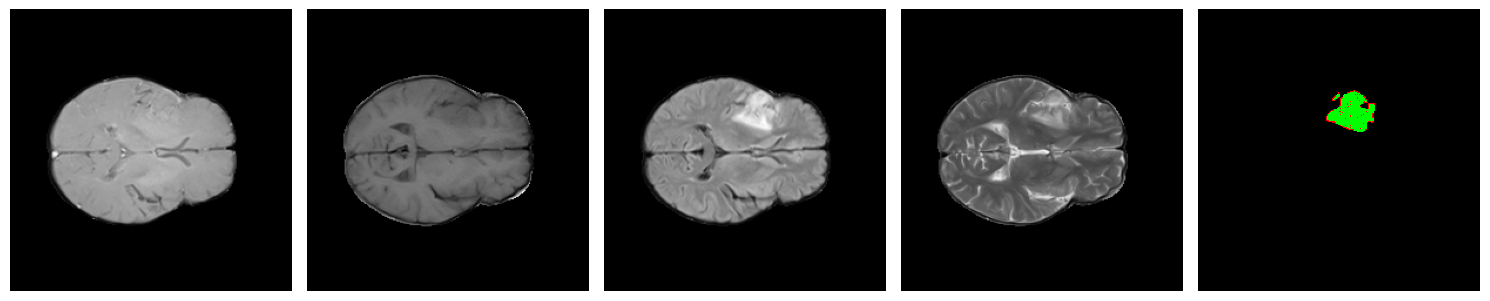

In [46]:
# Extract slice for visualisation purposes
# Extract 75th slice
imgs = [img_volumes[i].get_fdata().astype(np.float32)[:, :, 75] for i in range(len(img_volumes))]
lbl = seg_volume.get_fdata().astype(np.float32)[:, :, 75]

# Create colour map to plot
colours = ['black', 'red', 'lime', 'royalblue']
cmap = ListedColormap(colours)

fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15, 15))
for i, img in enumerate(imgs):
    ax[i].imshow(img, cmap='gray')
    ax[i].axis('off')
ax[-1].imshow(lbl, vmin=0, vmax=4, cmap=cmap)
ax[-1].axis('off')
plt.tight_layout()            
plt.show()

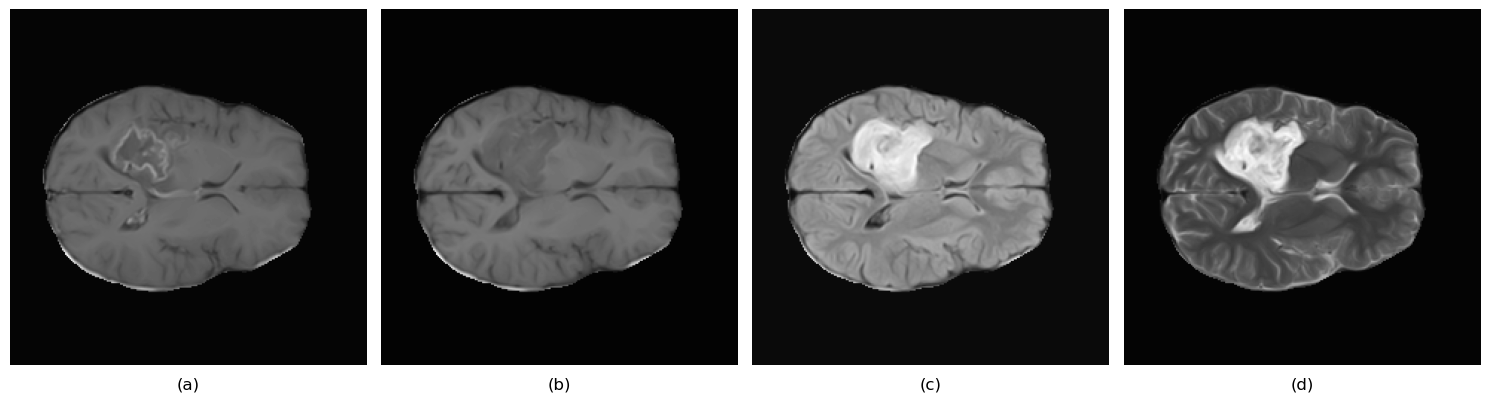

In [70]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 15))
labels = ["(a)", "(b)", "(c)", "(d)"]
for i, img in enumerate(imgs):
    ax[i].imshow(img, cmap='gray')
    ax[i].axis('off')
    ax[i].set_title(labels[i], y=-0.09)

    # ax[i].set_title(labels[i])
plt.tight_layout()    
plt.savefig('/Users/alexandrasmith/Desktop/Workspace/Projects/UNN_BraTS23/reports/' + img_folder + '.png', bbox_inches='tight')     
plt.show()   

# for i, img in enumerate(imgs):
#     plt.imshow(img, cmap="gray")
#     plt.axis('off')
#     plt.savefig('/Users/alexandrasmith/Desktop/Workspace/Projects/UNN_BraTS23/reports/' + img_folder + '_' + labels[i]  + '.png')

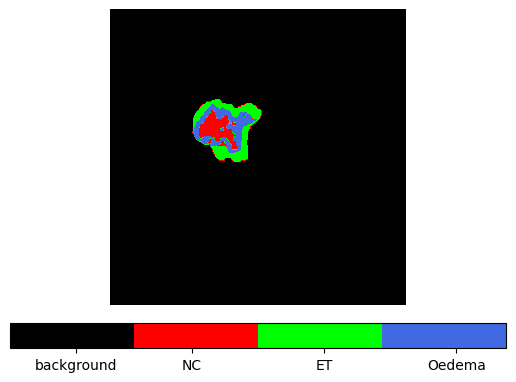

In [61]:
# Save segmentation mask
cax = plt.imshow(lbl, cmap=cmap)
plt.axis('off')
# plt.colorbar()
cbar = fig.colorbar(cax, ticks=[0.4, 1.1, 1.9, 2.7], orientation='horizontal', pad=0.05)
# plt.colorbar(ticks=['background', 'NC', 'ET', 'Oedema'])
cbar.ax.set_xticklabels(['background', 'NC', 'ET', 'Oedema'])
plt.savefig('/Users/alexandrasmith/Desktop/Workspace/Projects/UNN_BraTS23/reports/' + img_folder + '_seg'  + '.png')

### Trying to create a visual

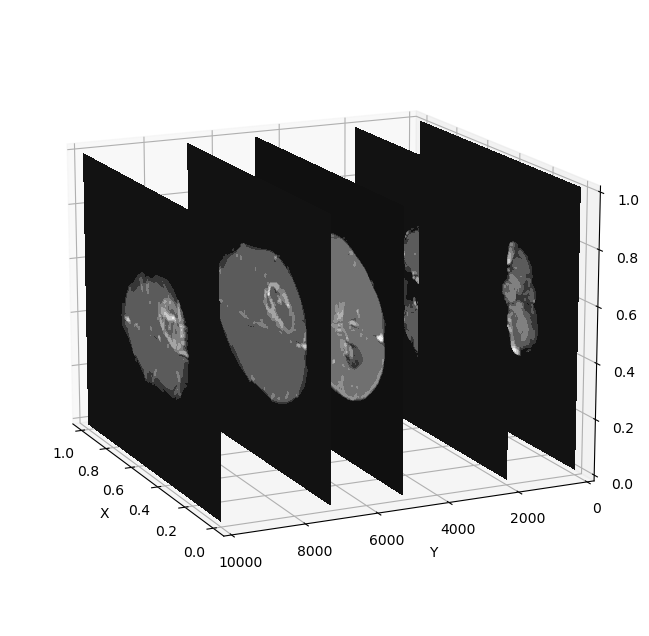

In [6]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# create a vertex mesh
X, Z = np.meshgrid(np.linspace(0,1,240), np.linspace(0,1,240))

# create the figure
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection ='3d')

data = imgs[0]
mod = img_volumes[0]

ax.contourf(X, mod.get_fdata().astype(np.float32)[:, :, 20], Z, zdir='y', offset=-0, cmap='gray')
ax.contourf(X, mod.get_fdata().astype(np.float32)[:, :, 50], Z, zdir='y', offset=2000.0, cmap='gray')
ax.contourf(X, mod.get_fdata().astype(np.float32)[:, :, 75], Z, zdir='y', offset=5000.0, cmap='gray')
ax.contourf(X, mod.get_fdata().astype(np.float32)[:, :, 110], Z, zdir='y', offset=7000.0, cmap='gray')
ax.contourf(X, mod.get_fdata().astype(np.float32)[:, :, 130], Z, zdir='y', offset=10000.0, cmap='gray')

ax.view_init(15,155)
ax.set_ylim((0., 10000))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# for axis in [ax1.xaxis, ax1.yaxis, ax1.zaxis]:
# # for axis in [ax1.yaxis]:
#     axis.set_ticklabels([])
#     axis._axinfo['axisline']['linewidth'] = 1
#     axis._axinfo['axisline']['color'] = (0, 0, 0)
#     axis._axinfo['grid']['linewidth'] = 0.5
#     axis._axinfo['grid']['linestyle'] = "-"
#     axis._axinfo['grid']['color'] = (0, 0, 0)
#     axis._axinfo['tick']['inward_factor'] = 0.0
#     axis._axinfo['tick']['outward_factor'] = 0.0
#     axis.set_pane_color((0.95, 0.95, 0.95))
plt.show()

AA To Do List for data exploration:
Check header information for SSA data
Check interslice distributions

